# Lib

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# from sklearn.learning_curve import learning_curve
from sklearn.model_selection import cross_val_score, cross_val_predict,learning_curve,validation_curve,GridSearchCV
# from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
# from sklearn.learning_curve import validation_curve
# from sklearn.grid_search import GridSearchCV
# Models
from sklearn import tree
from sklearn import ensemble
from sklearn import naive_bayes
from sklearn import neural_network
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

# Load data

In [2]:
mooc=pd.read_excel('15_16_Dim_AR.xlsx')
mooc.set_index("anon_screen_name",inplace=True)
mooc.head()

,nbr_events_x,nbr_week_x,nbr_pause_video,nbr_problem_visit,problem_stay_min,nbr_problem_submit,avg_problem_submit,nbr_forum_post,nbr_sessions,nbr_problem_show,problem_show_stay,avg_problem_show,outline,view_post,cluster_active,cluster_reflective,certs_y,LS
anon_screen_name,,,,,,,,,,,,,,,,,,
mooc15_000319dcc413983e25dee182bae7b1d76ebe8d9b,15,1,2,0,0.000000,0,0.000000,0,1,0,0.000000,0.000000,3,0,Very Weak,Very Weak,0,Balenced
mooc15_0003ece6f51872662ee9b366cd2a72434e01a139,382,1,32,6,0.366667,0,0.000000,0,93,0,0.000000,0.000000,2,21,Very Weak,Very Weak,0,Balenced
mooc15_00042c13310b03b6fc30c30c34efd2ad127517be,99,1,9,5,1.033333,5,1.000000,0,1,2,1.050000,0.400000,3,0,Moderate,Moderate,0,Balenced
mooc15_00055cea4f5db0c8569127d8ac89a7d130c730cf,2214,5,309,23,8.566667,20,0.869565,0,13,20,8.216667,0.869565,12,0,Moderate,Weak,0,Moderate_active
mooc15_0007c3a1163a8b19781443bde21b785900f56814,127,1,9,3,2.116667,3,1.000000,0,2,1,0.000000,0.333333,5,0,Moderate,Moderate,0,Balenced


In [9]:
mooc.LS.value_counts()

Balenced               40128
Moderate_active         7297
Moderate_reflective     2849
Strong_active           2171
Strong_reflective        124
Name: LS, dtype: int64

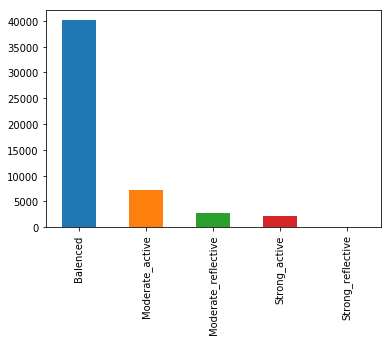

In [8]:

mooc.LS.value_counts().plot(kind='bar');


In [29]:
mooc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52569 entries, mooc15_000319dcc413983e25dee182bae7b1d76ebe8d9b to mooc16_fffef9acd2bd734fd06382e2efd600cd63915382
Data columns (total 18 columns):
nbr_events_x          52569 non-null int64
nbr_week_x            52569 non-null int64
nbr_pause_video       52569 non-null int64
nbr_problem_visit     52569 non-null int64
problem_stay_min      52569 non-null float64
nbr_problem_submit    52569 non-null int64
avg_problem_submit    52569 non-null float64
nbr_forum_post        52569 non-null int64
nbr_sessions          52569 non-null int64
nbr_problem_show      52569 non-null int64
problem_show_stay     52569 non-null float64
avg_problem_show      52569 non-null float64
outline               52569 non-null int64
view_post             52569 non-null int64
cluster_active        52569 non-null object
cluster_reflective    52569 non-null object
certs_y               52569 non-null int64
LS                    52569 non-null object
dtypes: float64(4), int

In [30]:
# (52569 , 18)
mooc.columns

Index(['nbr_events_x', 'nbr_week_x', 'nbr_pause_video', 'nbr_problem_visit',
       'problem_stay_min', 'nbr_problem_submit', 'avg_problem_submit',
       'nbr_forum_post', 'nbr_sessions', 'nbr_problem_show',
       'problem_show_stay', 'avg_problem_show', 'outline', 'view_post',
       'cluster_active', 'cluster_reflective', 'certs_y', 'LS'],
      dtype='object')

# Training dataset, Test dataset

In [55]:
mooc_data=mooc[[ 'nbr_pause_video', 'nbr_problem_visit',
       'problem_stay_min', 'nbr_problem_submit', 'avg_problem_submit',
       'nbr_forum_post', 'nbr_sessions', 
      'nbr_problem_show', 'problem_show_stay', 'avg_problem_show', 'outline', 'view_post', 'LS']]
mooc_data = shuffle(mooc_data)

features=mooc_data[[ 'nbr_pause_video', 'nbr_problem_visit',
       'problem_stay_min', 'nbr_problem_submit', 'avg_problem_submit',
       'nbr_forum_post', 'nbr_sessions',
      'nbr_problem_show', 'problem_show_stay', 'avg_problem_show', 'outline', 'view_post']]
targets=mooc_data[['LS']]

x_train, x_test, y_train, y_test =train_test_split(features,targets,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)


(42055, 12)
(10514, 12)


Balenced               8078
Moderate_active        1412
Moderate_reflective     551
Strong_active           446
Strong_reflective        27
Name: LS, dtype: int64

In [50]:
y_test.LS.value_counts()

Balenced               8020
Moderate_active        1447
Moderate_reflective     570
Strong_active           450
Strong_reflective        27
Name: LS, dtype: int64

# DecisionTreeClassifier

In [56]:
# clf_tree= tree.DecisionTreeClassifier(max_depth=8)
clf_tree= tree.DecisionTreeClassifier(max_depth=8,criterion= 'entropy',splitter="best",max_features=None)
clf_tree_model=clf_tree.fit(x_train,y_train)

print('Training Accuracy: %.3f' % clf_tree.score(x_train,y_train))
print('Test Accuracy: %.3f' % clf_tree.score(x_test, y_test))

Training Accuracy: 0.993
Test Accuracy: 0.991


In [39]:
x_train.columns

Index(['nbr_pause_video', 'nbr_problem_visit', 'problem_stay_min',
       'nbr_problem_submit', 'avg_problem_submit', 'nbr_forum_post',
       'nbr_sessions', 'nbr_problem_show', 'problem_show_stay',
       'avg_problem_show', 'outline', 'view_post'],
      dtype='object')

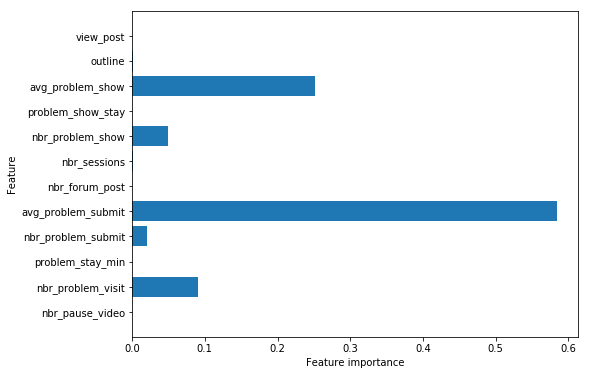

In [41]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 12
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_diabetes(clf_tree)
# plt.savefig('feature_importance')

In [31]:
# dot_data = tree.export_graphviz(clf_tree, out_file=None, 
#                          feature_names=x_train.columns,  
#                          class_names=y_train.LS.unique(),
#                          filled=True, rounded=True                         )  
# graph = graphviz.Source(dot_data)  
# graph.save("viz.png")
# graph 

## Cross validation

In [24]:
scores_cv = cross_val_score(clf_tree, x_train, y_train['LS'], cv=10,n_jobs=-1)
print(scores_cv)
print('scores_cv Accuracy: %.3f' % scores_cv.mean())

[0.99168449 0.98930354 0.98834998 0.989301   0.98906324 0.99072533
 0.98905804 0.99143673 0.98834443 0.98810657]
scores_cv Accuracy: 0.990


## Learning  Curve

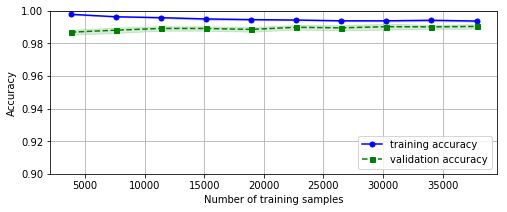

In [7]:
train_sizes, train_scores, test_scores =  learning_curve(estimator=clf_tree,
                                    X=x_train,
                                    y=y_train['LS'],
                                    train_sizes=np.linspace(0.1, 1.0, 10),
                                    cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



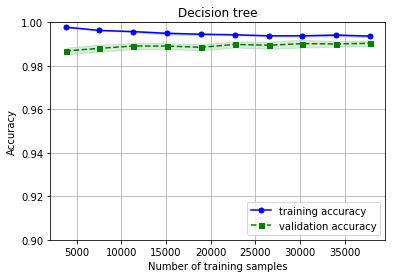

In [15]:
plt.figure(figsize=(6,4))
plt.title("Decision tree")
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9, 1.0])
plt.show()

As we can see in the preceding learning curve plot, our model performs quite
well on the test dataset. However, it may be slightly overfitting the training
data indicated by a relatively small, but visible, gap between the training and
cross-validation accuracy curves.

## Validation curves : overfitting and underfitting 

It looks like the tree is overfitting the training data. This is because the default tree will have leaf nodes that match each case in the training data set. Limiting the depth of the tree will help with this.

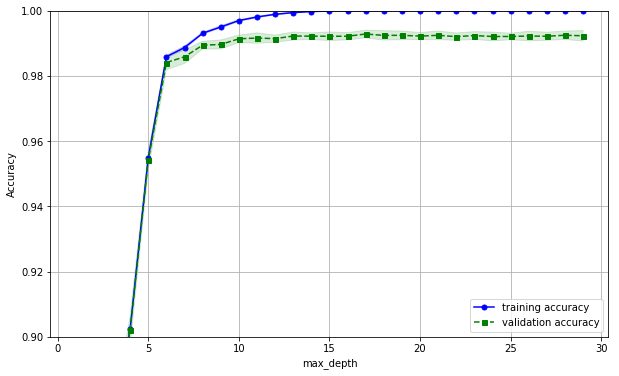

In [26]:
param_range = list(range(1, 30))
train_scores, test_scores = validation_curve(estimator=clf_tree,
            X=x_train,
            y=y_train['LS'],
            param_name='max_depth',
            param_range=param_range,cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(param_range, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15,color='blue')
plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0])
plt.show()

Although the differences in the accuracy for varying values of C are subtle, we can see that the model slightly underfits the data when we increase the regularization strength (small values of C). However, for large values of C, it means lowering the strength of regularization, so the model tends to slightly overfit the data. In this case, the sweet spot appears to be around C=0.1.

## GridSearch

In [19]:
param_grid = {
    'criterion'         : ['gini', 'entropy'],
    'max_features'      : ['sqrt', 'log2', None],
    'max_depth'         : list(range(1,20))
}

gs_tree = GridSearchCV(estimator=clf_tree,
                param_grid=param_grid,
                scoring='accuracy',
                cv=10,
                n_jobs=-1)
gs_tree = gs_tree.fit(x_train, y_train["LS"])

print(gs_tree.best_score_)
print(gs_tree.best_params_)


0.9925573653548924
{'criterion': 'entropy', 'max_depth': 15, 'max_features': None}


In [47]:
# gs_tree = GridSearchCV(estimator=clf_tree,
#                 param_grid=param_grid,
#                 scoring='accuracy',
#                 cv=10,
#                 n_jobs=-1)

# scores = cross_val_score(gs_tree, x_train, y_train['LS'], 
#                          scoring='accuracy', cv=10)
# print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
#                                       np.std(scores)))

CV accuracy: 0.992 +/- 0.001


## Performance metrics

In [93]:
clf_tree= tree.DecisionTreeClassifier(max_depth=8,criterion= 'entropy',
                                      splitter="best")
clf_tree_model=clf_tree.fit(x_train,y_train)

print('Train accuracy: %.3f' % clf_tree.score(x_train, y_train))
print('Test accuracy: %.3f' % clf_tree.score(x_test, y_test))

Train accuracy: 0.993
Test accuracy: 0.989


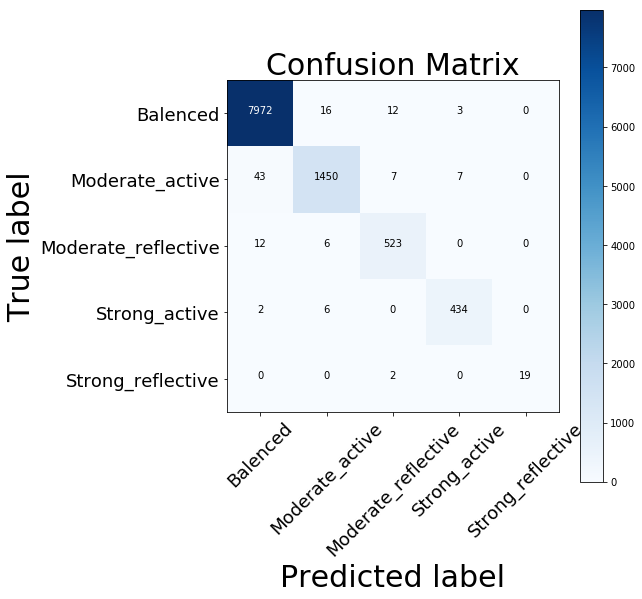

In [95]:
import itertools
class_names = ['Balenced','Moderate_active','Moderate_reflective','Strong_active','Strong_reflective']
predection=clf_tree.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predection)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()

In [96]:
predection=clf_tree.predict(x_test)
# print(confusion_matrix(y_test,predection))
print(classification_report(y_test,predection))

                     precision    recall  f1-score   support

           Balenced       0.99      1.00      0.99      8003
    Moderate_active       0.98      0.96      0.97      1507
Moderate_reflective       0.96      0.97      0.96       541
      Strong_active       0.98      0.98      0.98       442
  Strong_reflective       1.00      0.90      0.95        21

          micro avg       0.99      0.99      0.99     10514
          macro avg       0.98      0.96      0.97     10514
       weighted avg       0.99      0.99      0.99     10514



In [34]:
from sklearn.metrics import precision_score
print("Precision (macro): %f" % precision_score(y_test, predection, average='macro'))
print("Precision (micro): %f" % precision_score(y_test, predection, average='micro'))

Precision (macro): 0.985698
Precision (micro): 0.991345


<hr style="border: 1px solid #330000;">

# Random Forest

In [57]:
clf_rf= ensemble.RandomForestClassifier(n_estimators=7,max_depth=8)
clf_rf_model=clf_rf.fit(x_train,y_train)

print('Training Accuracy: %.3f' % clf_rf.score(x_train,y_train))
print('Test Accuracy: %.3f' % clf_rf.score(x_test, y_test))

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Training Accuracy: 0.990
Test Accuracy: 0.987


## Cross Validation

In [34]:
scores_cv_rf = cross_val_score(clf_rf, x_train, y_train['LS'], cv=10,n_jobs=1)
print(scores_cv_rf)
print('scores_cv Accuracy: %.3f' % scores_cv_rf.mean())

[0.98099311 0.98336106 0.98644793 0.98692344 0.9871612  0.98359096
 0.98001903 0.98168411 0.98882017 0.9809705 ]
scores_cv Accuracy: 0.984


## Learning Curve

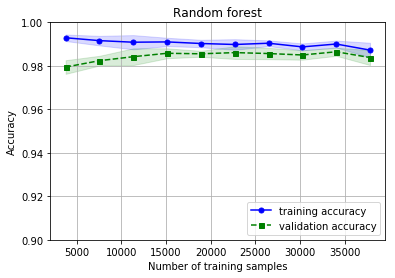

In [17]:
train_sizes, train_scores, test_scores =  learning_curve(estimator=clf_rf,
    X=x_train,
    y=y_train['LS'],
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(6,4))
plt.title("Random forest")
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9, 1.0])
plt.show()

## Validation Curve

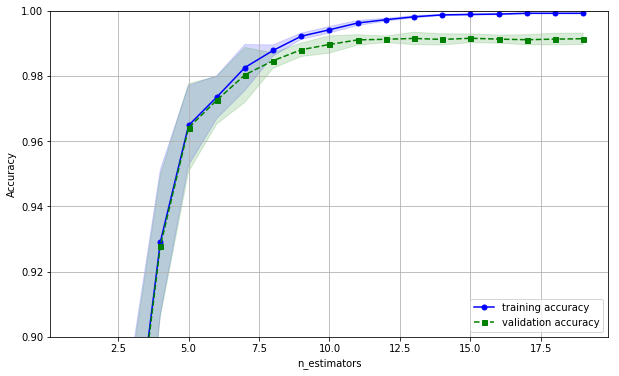

In [45]:
param_range = np.arange(1, 20)
train_scores, test_scores = validation_curve(estimator=clf_rf,
            X=x_train,
            y=y_train['LS'],
            param_name='max_depth',
            param_range=param_range,cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(param_range, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15,color='blue')
plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0])
plt.show()

## GridSearch

In [38]:
param_grid = {
    'max_depth': [5,10,15, 20, 30],
     'n_estimators': np.arange(5, 20)
}
gs = GridSearchCV(estimator=clf_rf,
                param_grid=param_grid,
                scoring='accuracy',
                cv=10,
                n_jobs=-1)

gs = gs.fit(x_train, y_train["LS"])
print(gs.best_score_)
print(gs.best_params_)

0.993890214797136
{'max_depth': 30, 'n_estimators': 19}


## Performance metrics

In [75]:
clf_rf= ensemble.RandomForestClassifier(n_estimators=7,max_depth=8)
clf_rf.fit(x_train, y_train)
print('Train accuracy: %.3f' % clf_rf.score(x_train, y_train))
print('Test accuracy: %.3f' % clf_rf.score(x_test, y_test))


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train accuracy: 0.989
Test accuracy: 0.988


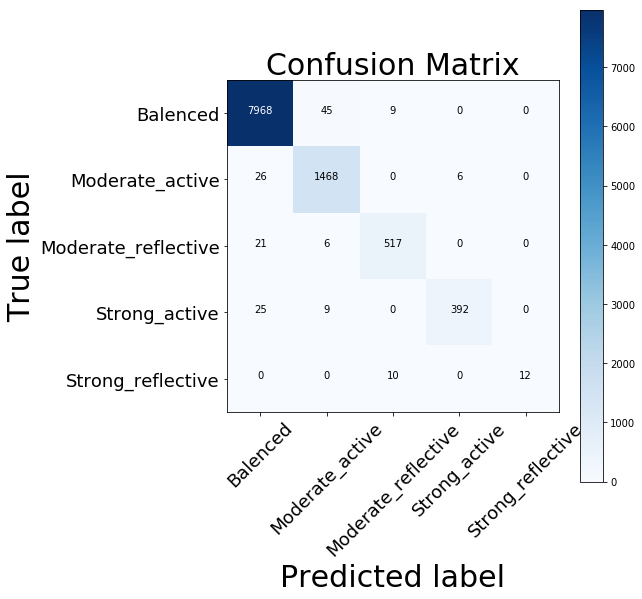

In [37]:
import itertools
class_names = ['Balenced','Moderate_active','Moderate_reflective','Strong_active','Strong_reflective']
predection=clf_rf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predection)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()

In [76]:
predection=clf_rf.predict(x_test)
# print(confusion_matrix(y_test,predection))
print(classification_report(y_test,predection))

                     precision    recall  f1-score   support

           Balenced       1.00      0.99      0.99      8003
    Moderate_active       0.95      0.99      0.97      1507
Moderate_reflective       0.96      0.96      0.96       541
      Strong_active       0.99      0.96      0.98       442
  Strong_reflective       1.00      0.62      0.76        21

          micro avg       0.99      0.99      0.99     10514
          macro avg       0.98      0.90      0.93     10514
       weighted avg       0.99      0.99      0.99     10514



In [40]:
from sklearn.metrics import precision_score
print("Precision (macro): %f" % precision_score(y_test, predection, average='macro'))
print("Precision (micro): %f" % precision_score(y_test, predection, average='micro'))

Precision (macro): 0.980251
Precision (micro): 0.985068


<hr style="border: 1px solid #330000;">

# Naive Bayes

In [132]:
clf_nb= naive_bayes.MultinomialNB()
clf_nb_model=clf_nb.fit(x_train,y_train)

print('Training Accuracy: %.3f' % clf_nb.score(x_train,y_train))
print('Test Accuracy: %.3f' % clf_nb.score(x_test, y_test))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.650
Test Accuracy: 0.645


## Cross Validation

In [134]:
scores_cv_nb = cross_val_score(clf_nb, x_train, y_train['LS'], cv=10,n_jobs=1)
print(scores_cv_nb)
print('scores_cv Accuracy: %.3f' % scores_cv_nb.mean())

[ 0.64909351  0.6557729   0.64662372  0.64113577  0.64844869  0.64343675
  0.66221055  0.65266173  0.6578319   0.64613181]
scores_cv Accuracy: 0.650


## Learning Curve

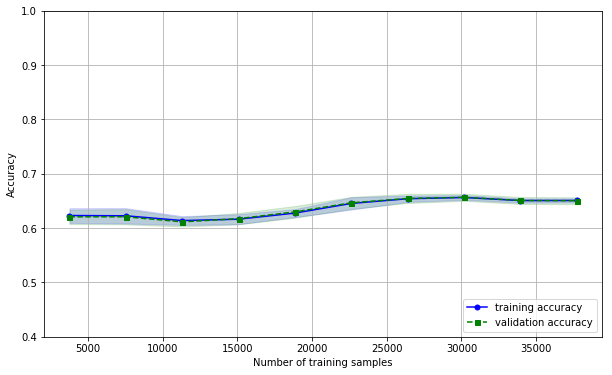

In [136]:
train_sizes, train_scores, test_scores =  learning_curve(estimator=clf_nb,
    X=x_train,
    y=y_train['LS'],
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 1.0])
plt.show()

<hr style="border: 1px solid #330000;">

# Neural network

In [65]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled  = scaler.fit_transform(x_test)

clf_nn= neural_network.MLPClassifier(hidden_layer_sizes= 7, max_iter= 500)
clf_nn_model=clf_nn.fit(X_train_scaled,y_train)

print('Training Accuracy: %.3f' % clf_nn.score(X_train_scaled,y_train))
print('Test Accuracy: %.3f' % clf_nn.score(X_test_scaled, y_test))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarni

Training Accuracy: 0.980
Test Accuracy: 0.978


## Cross Validation

In [36]:
scores_cv_nn = cross_val_score(clf_nn, x_train, y_train['LS'], cv=10,n_jobs=-1)
print(scores_cv_nn)
print('scores_cv Accuracy: %.3f' % scores_cv_nn.mean())

[0.96886142 0.96529594 0.96173045 0.95625297 0.96267237 0.91319857
 0.96195006 0.95505351 0.96146527 0.94718059]
scores_cv Accuracy: 0.955


## Learning Curve

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

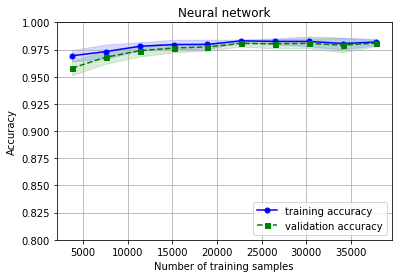

In [66]:
train_sizes, train_scores, test_scores =  learning_curve(estimator=clf_nn,
    X=X_train_scaled,
    y=y_train['LS'],
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(6,4))
plt.title("Neural network")
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

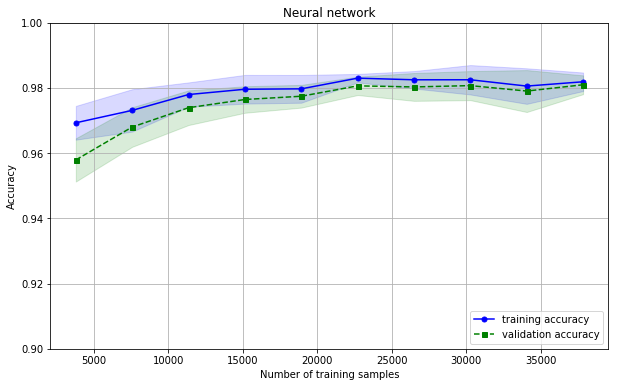

In [68]:
plt.figure(figsize=(10,6))
plt.title("Neural network")
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.9, 1.0])
plt.show()

## Validation Curve

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

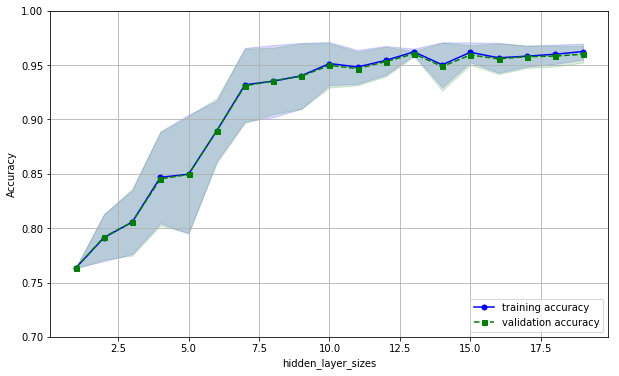

In [10]:
param_range = list(range(1, 20))
train_scores, test_scores = validation_curve(estimator=clf_nn,
            X=x_train,
            y=y_train['LS'],
            param_name='hidden_layer_sizes',
            param_range=param_range,cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(param_range, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15,color='blue')
plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('hidden_layer_sizes')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
plt.show()

In [12]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## GridSearch

In [13]:
param_grid = {'max_iter': [500,1000,1500], 
              'hidden_layer_sizes':[6,7,8,9,10,11,12,13]
             }

gs = GridSearchCV(estimator=clf_nn,
                param_grid=param_grid,
                scoring='accuracy',
                cv=10,
                n_jobs=-1)

gs = gs.fit(x_train, y_train["LS"])
print(gs.best_score_)
print(gs.best_params_)

0.9626679348472239
{'hidden_layer_sizes': 11, 'max_iter': 500}


## Performance Metrics

In [59]:
from sklearn.preprocessing import StandardScaler
clf_nn= neural_network.MLPClassifier(hidden_layer_sizes= 7 , max_iter= 500)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled  = scaler.fit_transform(x_test)

clf_nn_model=clf_nn.fit(X_train_scaled,y_train)
print('Train accuracy: %.3f' % clf_nn.score(X_train_scaled, y_train))
print('Test accuracy: %.3f' % clf_nn.score(X_test_scaled, y_test))

# clf_nn= neural_network.MLPClassifier(hidden_layer_sizes= 7 , max_iter= 500)
# clf_nn_model=clf_nn.fit(x_train,y_train)
# print('Train accuracy: %.3f' % clf_nn.score(x_train, y_train))
# print('Test accuracy: %.3f' % clf_nn.score(x_test, y_test))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarni

Train accuracy: 0.982
Test accuracy: 0.976


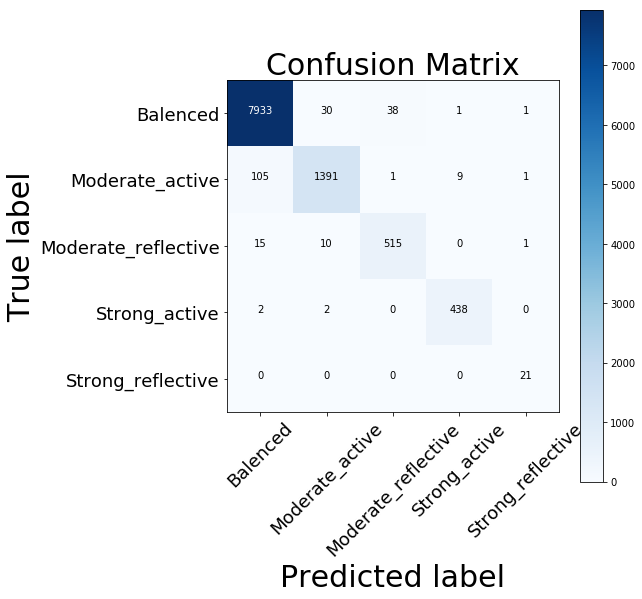

In [15]:
import itertools
class_names = ['Balenced','Moderate_active','Moderate_reflective','Strong_active','Strong_reflective']
predection=clf_nn.predict(X_test_scaled)
cnf_matrix = confusion_matrix(y_test, predection)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()

In [17]:
predection=clf_nn.predict(X_test_scaled)
# print(confusion_matrix(y_test,predection))
print(classification_report(y_test,predection))

                     precision    recall  f1-score   support

           Balenced       0.98      0.99      0.99      8003
    Moderate_active       0.97      0.92      0.95      1507
Moderate_reflective       0.93      0.95      0.94       541
      Strong_active       0.98      0.99      0.98       442
  Strong_reflective       0.88      1.00      0.93        21

          micro avg       0.98      0.98      0.98     10514
          macro avg       0.95      0.97      0.96     10514
       weighted avg       0.98      0.98      0.98     10514



In [26]:
from sklearn.metrics import precision_score
print("Precision (macro): %f" % precision_score(y_test, predection, average='macro'))
print("Precision (micro): %f" % precision_score(y_test, predection, average='micro'))

Precision (macro): 0.874479
Precision (micro): 0.961670


<hr style="border: 1px solid #330000;">

# k-Nearest Neighbors

In [19]:
clf_kn= KNeighborsClassifier(n_neighbors=50,leaf_size= 1,algorithm = 'auto')
clf_kn_model=clf_kn.fit(x_train,y_train)

print('Training Accuracy: %.3f' % clf_kn.score(x_train,y_train))
print('Test Accuracy: %.3f' % clf_kn.score(x_test, y_test))

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Training Accuracy: 0.822
Test Accuracy: 0.809


## Cross Validation

In [52]:
scores_cv_kn = cross_val_score(clf_kn, x_train, y_train['LS'], cv=10,n_jobs=1)
print(scores_cv_kn)
print('scores_cv Accuracy: %.3f' % scores_cv_kn.mean())

[0.8237111  0.82196339 0.82168331 0.82025678 0.8169282  0.81973841
 0.82944814 0.82088487 0.81541389 0.82302569]
scores_cv Accuracy: 0.821


## Learning Curve

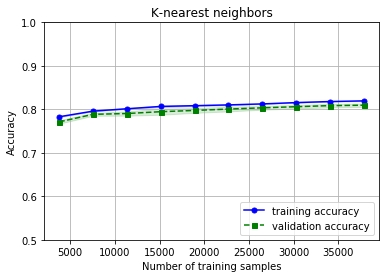

In [70]:
train_sizes, train_scores, test_scores =  learning_curve(estimator=clf_kn,
    X=x_train,
    y=y_train['LS'],
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(6,4))
plt.title("K-nearest neighbors")
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

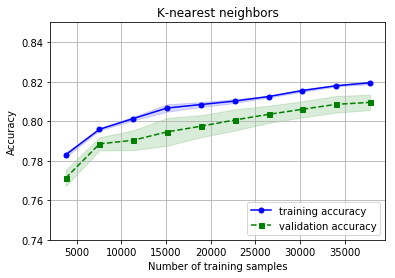

In [75]:
plt.figure(figsize=(6,4))
plt.title("K-nearest neighbors")
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.74, 0.85])
plt.show()

## Validation Curve

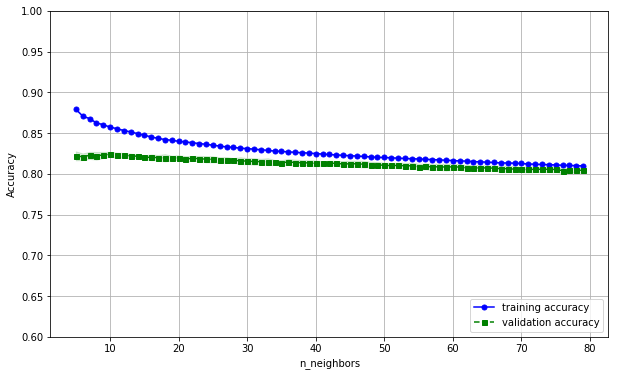

In [7]:
param_range = list(range(5, 80))
train_scores, test_scores = validation_curve(estimator=clf_kn,
            X=x_train,
            y=y_train['LS'],
            param_name='n_neighbors',
            param_range=param_range,cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(param_range, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15,color='blue')
plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.show()

## GridSearch

In [8]:
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
#           'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}

gs = GridSearchCV(estimator=clf_kn,
                param_grid=params,
                scoring='accuracy',
                cv=5,
                n_jobs=-1)

gs = gs.fit(x_train, y_train["LS"])
print(gs.best_score_)
print(gs.best_params_)

0.819688503150636
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 7}


## Performance metrics

In [69]:
clf_kn= KNeighborsClassifier(n_neighbors=50,leaf_size= 1,algorithm = 'auto')
clf_kn_model=clf_kn.fit(x_train,y_train)
print('Train accuracy: %.3f' % clf_kn.score(x_train, y_train))
print('Test accuracy: %.3f' % clf_kn.score(x_test, y_test))

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Train accuracy: 0.822
Test accuracy: 0.813


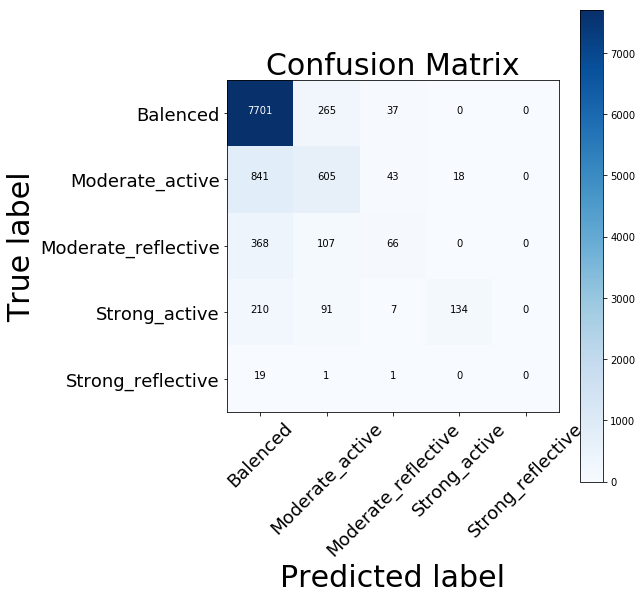

In [9]:
import itertools
class_names = ['Balenced','Moderate_active','Moderate_reflective','Strong_active','Strong_reflective']
predection=clf_kn.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predection)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()

In [10]:
predection=clf_kn.predict(x_test)
# print(confusion_matrix(y_test,predection))
print(classification_report(y_test,predection))

                     precision    recall  f1-score   support

           Balenced       0.84      0.96      0.90      8003
    Moderate_active       0.57      0.40      0.47      1507
Moderate_reflective       0.43      0.12      0.19       541
      Strong_active       0.88      0.30      0.45       442
  Strong_reflective       0.00      0.00      0.00        21

          micro avg       0.81      0.81      0.81     10514
          macro avg       0.54      0.36      0.40     10514
       weighted avg       0.78      0.81      0.78     10514



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
from sklearn.metrics import precision_score
print("Precision (macro): %f" % precision_score(y_test, predection, average='macro'))
print("Precision (micro): %f" % precision_score(y_test, predection, average='micro'))

Precision (macro): 0.540559
Precision (micro): 0.828134


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<hr style="border: 1px solid #330000;">

# SVM

In [62]:
# clf_svm = svm.SVC()
clf_svm = svm.SVC(C= 10, gamma= 0.0001, kernel= 'rbf')
clf_svm_model= clf_svm.fit(x_train,y_train)

print('Training Accuracy: %.3f' % clf_svm.score(x_train,y_train))
print('Test Accuracy: %.3f' % clf_svm.score(x_test, y_test))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy: 0.887
Test Accuracy: 0.863


## Cross Validation

In [23]:
scores_cv_svm = cross_val_score(clf_svm, x_train, y_train['LS'], cv=10, n_jobs=-1)
print(scores_cv_svm)
print('scores_cv Accuracy: %.3f' % scores_cv_svm.mean())

[ 0.79413168  0.79842557  0.80009542  0.79580153  0.80128817  0.79684889
  0.80396371  0.79441261  0.79560649  0.79675185]
scores_cv Accuracy: 0.798


## Learning Curve

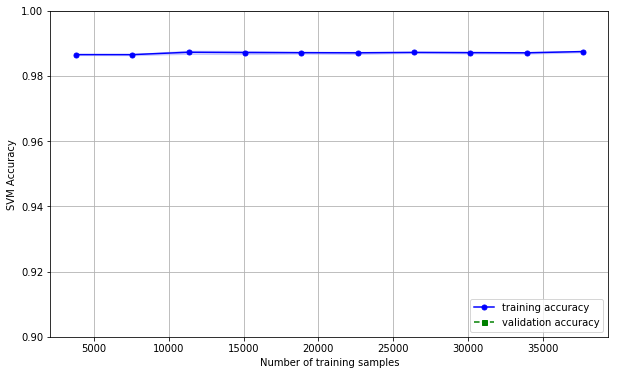

In [24]:
train_sizes, train_scores, test_scores =  learning_curve(estimator=clf_svm,
    X=x_train,
    y=y_train['LS'],
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=10,n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('SVM Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.show()

## Validation Curve

In [12]:
param_range = np.arange(5, 20)
train_scores, test_scores = validation_curve(estimator=clf_svm,
            X=x_train,
            y=y_train['LS'],
            param_name='C',
            param_range=param_range,cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(param_range, train_mean,color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15,color='blue')
plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1.0])
plt.show()

KeyboardInterrupt: 

## Performance metrics

In [23]:
# clf_svm = svm.SVC(C= 20, gamma= 0.001, kernel= 'rbf')
# clf_svm_model=clf_svm.fit(x_train,y_train)
print('Train accuracy: %.3f' % clf_svm.score(x_train, y_train))
print('Test accuracy: %.3f' % clf_svm.score(x_test, y_test))

Train accuracy: 0.887
Test accuracy: 0.868


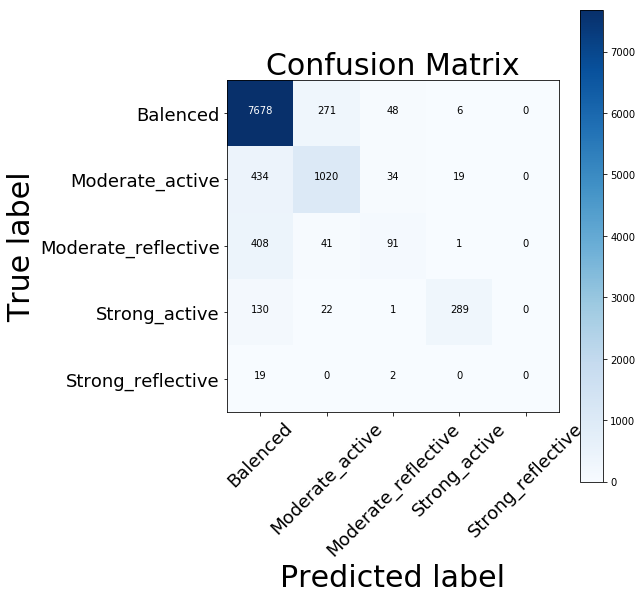

In [63]:
import itertools
class_names = ['Balenced','Moderate_active','Moderate_reflective','Strong_active','Strong_reflective']
predection=clf_svm.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predection)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=30)
plt.show()

In [64]:
predection=clf_svm.predict(x_test)
# print(confusion_matrix(y_test,predection))
print(classification_report(y_test,predection))

                     precision    recall  f1-score   support

           Balenced       0.89      0.96      0.92      8003
    Moderate_active       0.75      0.68      0.71      1507
Moderate_reflective       0.52      0.17      0.25       541
      Strong_active       0.92      0.65      0.76       442
  Strong_reflective       0.00      0.00      0.00        21

          micro avg       0.86      0.86      0.86     10514
          macro avg       0.61      0.49      0.53     10514
       weighted avg       0.85      0.86      0.85     10514



C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
from sklearn.metrics import precision_score,f1_score,accuracy_score
print("Precision (macro): %f" % precision_score(y_test, predection, average='macro'))
print("Precision (micro): %f" % precision_score(y_test, predection, average='micro'))
# print("Accuracy: %1.4f" % (accuracy_score(y_test, predection)))

Precision (macro): 0.639762
Precision (micro): 0.868176


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# Building Models for iris flower classification

np.random.seed(1000)
# making a list of ml classification models
models = []

def classification_Models(xtrain,xtest, ytrain, ytest ):
    

    
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('CART',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  GaussianNB()) )
    models.append( ('LDA',  LinearDiscriminantAnalysis()) )
    models.append( ('SVM',  SVC()) )

    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, xtrain, ytrain, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(xtrain,xtest, ytrain, ytest)

In [ ]:
# Evaluating and predicting models


for name,model in models:
    trainedmodel = model.fit(xtrain,ytrain)
    
    # prediction
    ypredict = trainedmodel.predict(xtest)
    
    acc = accuracy_score(ytest,ypredict)
    classreport = classification_report(ytest,ypredict)
    confMat = confusion_matrix(ytest,ypredict)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    
    
    # save models
    import pickle as pk
    
    with open('model_'+name+'.pickle','wb') as f:
        pk.dump(trainedmodel,f)
    